In [ ]:
!pip install pandas mysql-connector-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.4/27.4 MB 29.5 MB/s eta 0:00:00


In [8]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
try:
    # Establish a connection to the MySQL database
    connection = mysql.connector.connect(
        host='127.0.0.1',
        user='root',
        password='',
        database='share_consumption_db'
    )

    query_list = ["high_fossil_consumption", "high_gdp_avg", "high_renewable_consumption", "share_of_consumption", "gdp", "countries"   ]
    # Execute a SQL query and fetch the results into a pandas DataFrame and save to csv
    for table_name in query_list:
        query = f"SELECT * FROM {table_name}"
        df = pd.read_sql(query, connection)
        df.to_csv(f'{table_name}.csv', index=False)

    # Close the database connection
    connection.close()

    # Display the DataFrame
    #print(df.head())

except mysql.connector.Error as error:
    # Exception occurred, handle the error
    print("Error connecting to MySQL database:", error)

Error connecting to MySQL database: 2003 (HY000): Can't connect to MySQL server on '127.0.0.1:3306' (111)


In [23]:
#open up csv files
# Load the data
df = pd.read_csv('share_of_consumption.csv')
df_countries = pd.read_csv('countries.csv')  

# Display the first few rows to ensure it's loaded correctly
print(df.head())

  iso_code  year_of_data  renewables_percentage  fossil_fuels_percentage
0      ARE          1965                    0.0                    100.0
1      ARE          1966                    0.0                    100.0
2      ARE          1967                    0.0                    100.0
3      ARE          1968                    0.0                    100.0
4      ARE          1969                    0.0                    100.0


In [24]:
# Create a dictionary mapping of iso_code to country_name
country_dict = pd.Series(df_countries.country_name.values,index=df_countries.iso_code).to_dict()

# Replace iso_code with country_name in the DataFrame
df['iso_code'] = df['iso_code'].map(country_dict)

<ipython-input-45-d241188a258d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021.sort_values('renewables_percentage', ascending=False, inplace=True)


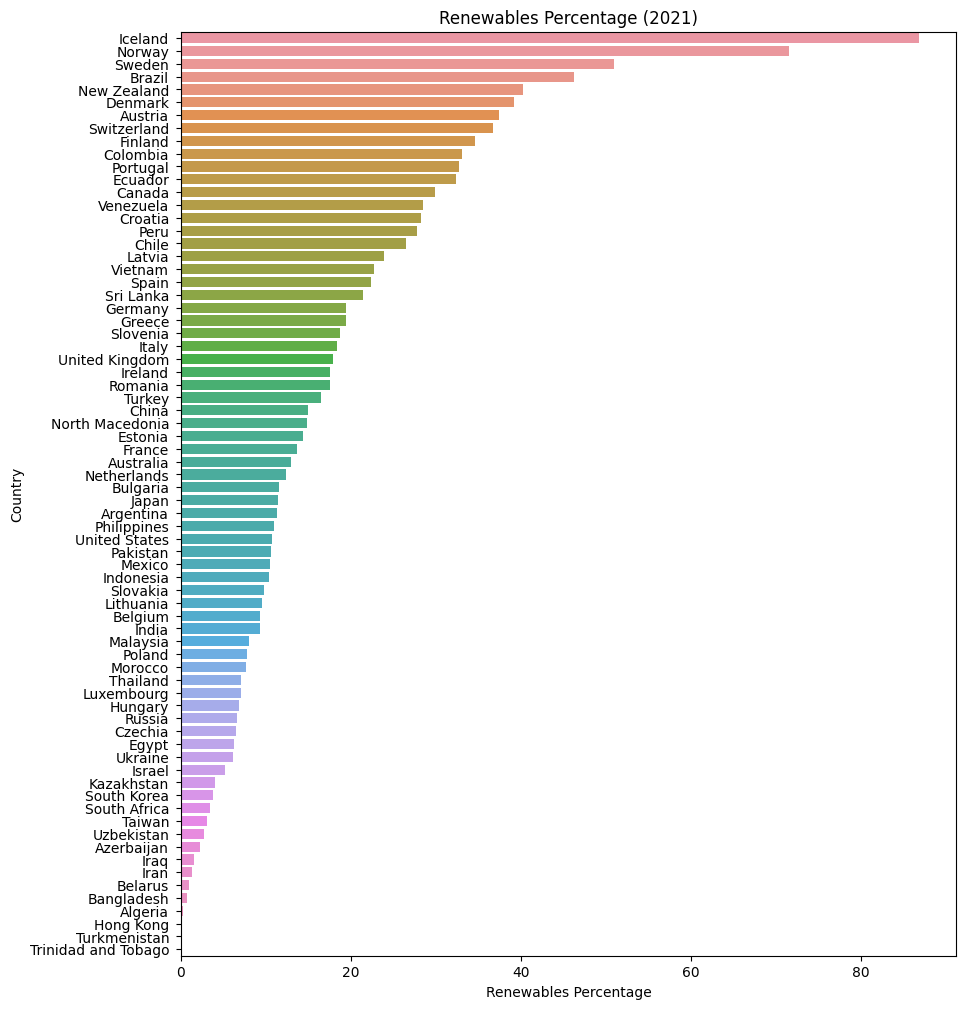

In [45]:
# Bar Chart for renewables percentage for a particular year (say 2021)
df_2021 = df[df['year_of_data'] == 2021]
df_2021.sort_values('renewables_percentage', ascending=False, inplace=True)

plt.figure(figsize=(10,12))
sns.barplot(x='renewables_percentage', y='iso_code', data=df_2021)  # Now 'iso_code' column contains country names
plt.title('Renewables Percentage (2021)')
plt.xlabel('Renewables Percentage')
plt.ylabel('Country')

# Adjust y labels distance
plt.tick_params(axis='y', which='major', pad=5)
plt.savefig("High_renewables_percentage_descending.png")
plt.show()


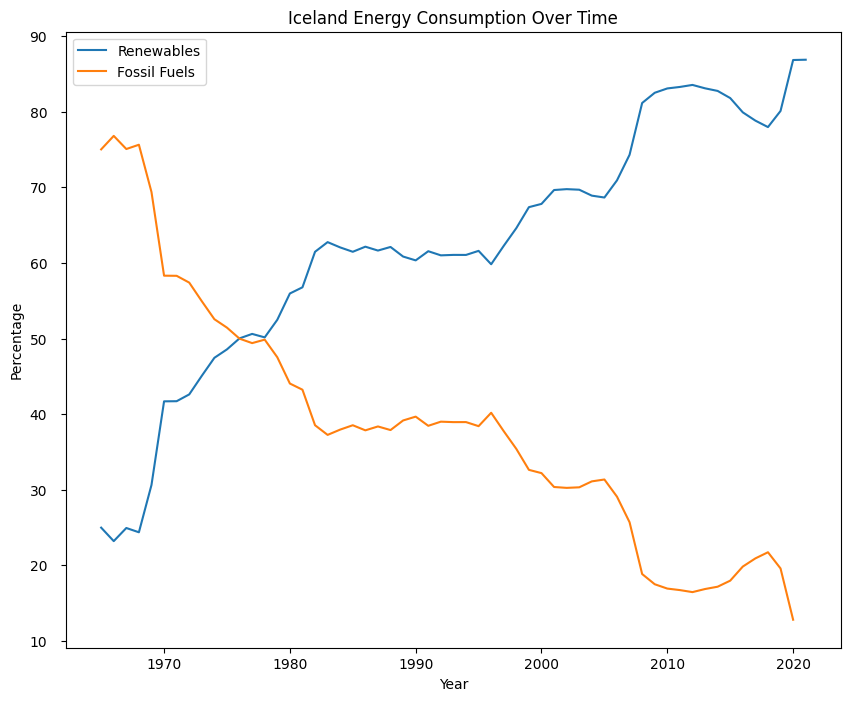

In [43]:
# Line Chart for renewables and fossil fuels percentage for a particular country (say 'USA')
df_usa = df[df['iso_code'] == 'USA']  # Replace 'USA' with the name of the country
highest_renewable_country = df.loc[df['renewables_percentage'].idxmax()]['iso_code']

# Line Chart for renewables and fossil fuels percentage for the country with highest renewable consumption
df_highest = df[df['iso_code'] == highest_renewable_country]

plt.figure(figsize=(10,8))
plt.plot(df_highest['year_of_data'], df_highest['renewables_percentage'], label='Renewables')
plt.plot(df_highest['year_of_data'], df_highest['fossil_fuels_percentage'], label='Fossil Fuels')
plt.title(f"{highest_renewable_country} Energy Consumption Over Time")
plt.xlabel('Year')
plt.ylabel('Percentage')

# Adjust y labels distance
plt.tick_params(axis='y', which='major', pad=10)

plt.legend()
plt.savefig("Iceland_energy_consumption.png")
plt.show()



<ipython-input-44-3154235e4bb0>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = df.pivot('iso_code', 'year_of_data', 'renewables_percentage')


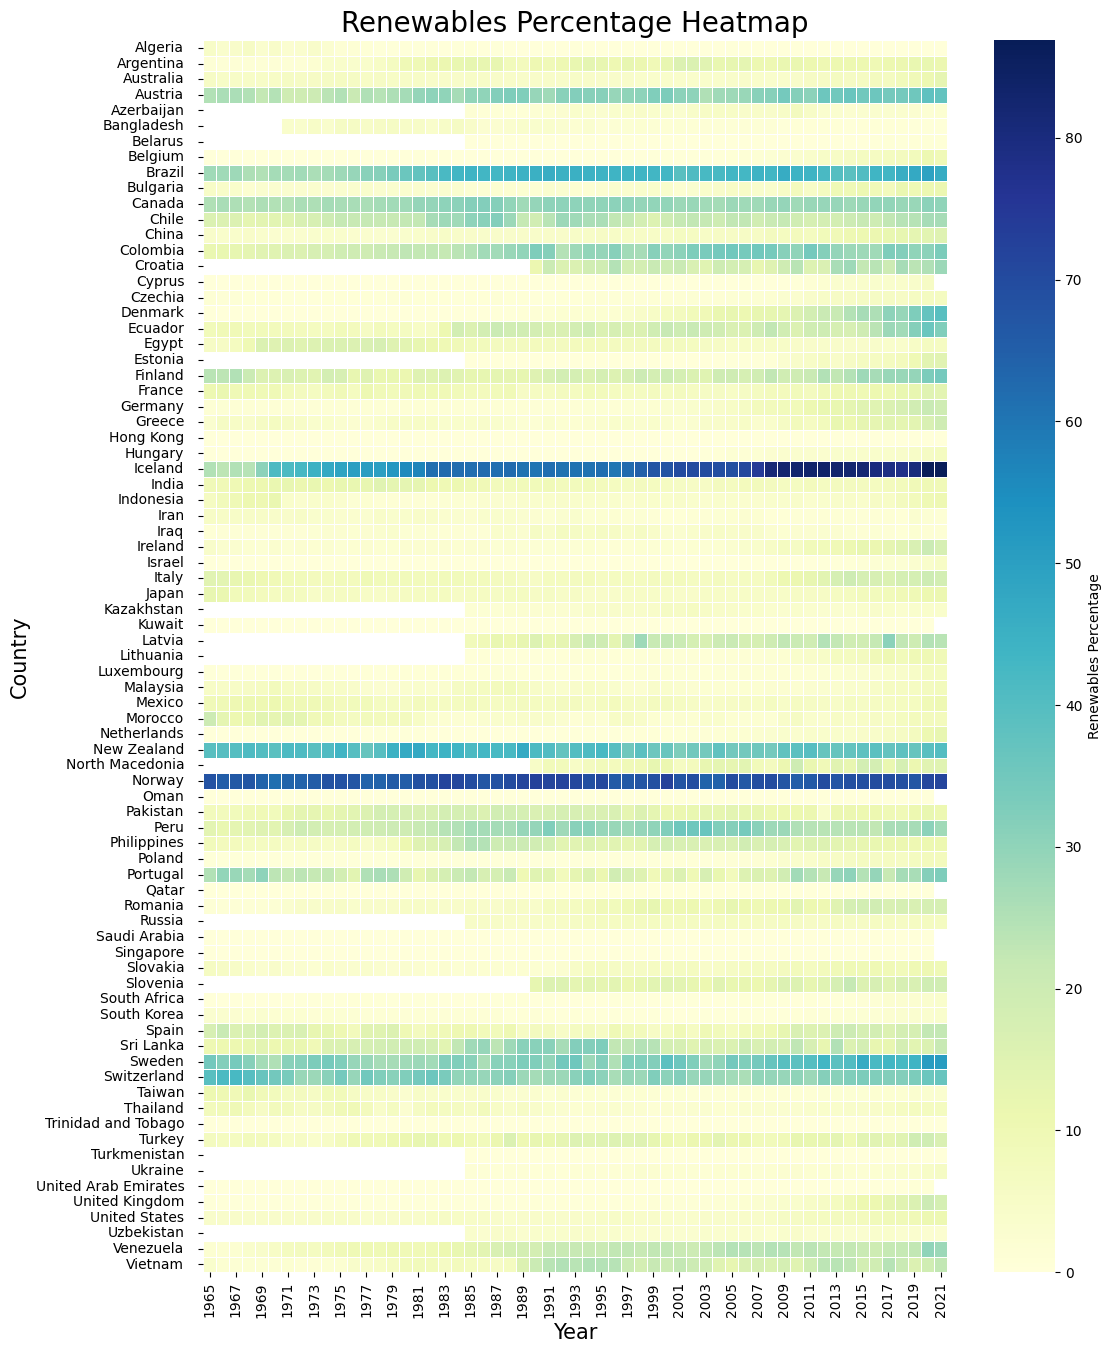

In [44]:
# Heatmap for renewables percentage across countries and years

# Create pivot table
pivot_table = df.pivot('iso_code', 'year_of_data', 'renewables_percentage')

# Draw the heatmap
plt.figure(figsize=(12,16))
sns.heatmap(pivot_table, cmap='YlGnBu', linewidths=0.5,  fmt=".1f", cbar_kws={'label': 'Renewables Percentage'})

# Set labels and titles
plt.title('Renewables Percentage Heatmap', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Country', fontsize=15)

# Adjust y labels distance
plt.tick_params(axis='y', which='major', pad=10)
plt.savefig('renewables_heat_map.png')
plt.show()
